CCMP wind data: https://www.remss.com/measurements/ccmp/

In [2]:
import urllib3
import pandas as pd
import os
import xarray as xr
import cartopy
import matplotlib.pyplot as plt
import numpy as np

http = urllib3.PoolManager()

#base_url = f'https://data.remss.com/ccmp/v03.1/Y2016/M{month:02d}/CCMP_Wind_Analysis_2016{month:02d}{day:02d}_V03.1_L4.nc'
save_path = '/g/data/xv83/bxh595/ccmp_2016'


In [3]:
dates = pd.date_range('2016-01-01', '2016-12-31')

for date in dates:
    if os.path.isfile(os.path.join(save_path, f'CCMP_Wind_Analysis_{date.year}{date.month:02d}{date.day:02d}_V03.1_L4.nc')):
        continue
    resp = http.request('GET', f'https://data.remss.com/ccmp/v03.1/Y{date.year}/M{date.month:02d}/CCMP_Wind_Analysis_{date.year}{date.month:02d}{date.day:02d}_V03.1_L4.nc', preload_content=False)
    if resp.status == 200:
        with open(os.path.join(save_path, f'CCMP_Wind_Analysis_{date.year}{date.month:02d}{date.day:02d}_V03.1_L4.nc'), 'wb') as f:
            f.write(resp.data)
        print(f'CCMP_Wind_Analysis_{date.year}{date.month:02d}{date.day:02d}_V03.1_L4.nc saved')

CCMP_Wind_Analysis_20160710_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160711_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160712_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160713_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160714_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160715_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160716_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160717_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160718_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160719_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160720_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160721_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160722_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160723_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160724_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160725_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160726_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160727_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160728_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160729_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160730_V03.1_L4.nc saved
CCMP_Wind_Analysis_20160731_V03.1_

In [21]:
a = xr.open_dataset('/g/data/xv83/bxh595/ccmp_2016/CCMP_Wind_Analysis_20160101_V03.1_L4.nc', chunks='auto')
a

<xarray.Dataset>
Dimensions:    (time: 4, latitude: 720, longitude: 1440)
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * time       (time) datetime64[ns] 2016-01-01 ... 2016-01-01T18:00:00
Data variables:
    uwnd       (time, latitude, longitude) float32 dask.array<chunksize=(4, 720, 1440), meta=np.ndarray>
    vwnd       (time, latitude, longitude) float32 dask.array<chunksize=(4, 720, 1440), meta=np.ndarray>
    ws         (time, latitude, longitude) float32 dask.array<chunksize=(4, 720, 1440), meta=np.ndarray>
    nobs       (time, latitude, longitude) float32 dask.array<chunksize=(4, 720, 1440), meta=np.ndarray>
Attributes: (12/54)
    contact:                       Remote Sensing Systems, support@remss.com
    Conventions:                   CF-1.7 ACDD-1.3
    data_structure:                grid
    title:                         RSS CCMP V3.1 6-hourly surface winds (Leve...
    summary:                       RSS VAM 6-hour analyses using ERA-5 wind r...
    institute_id:                  RSS
    ...                            ...
    time_coverage_end:             2016-01-01T23:59:59Z
    platform:                      Space-based Platforms>Earth Observation Sa...
    instrument:                    Earth Remote Sensing Instruments>Passive R...
    history:                       2024-04-02T00:02:15.768531Z - netCDF gener...
    base_date:                     Y2016 M01 D01
    date_created:                  2024-04-02T00:02:15.768531Z

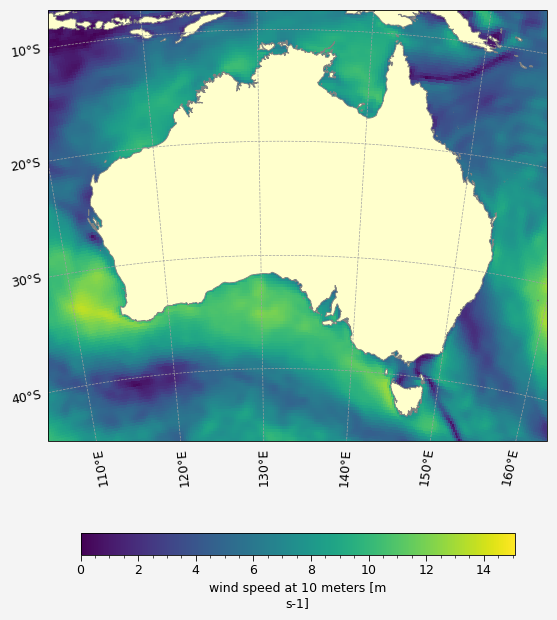

In [36]:
b = a.isel(time=0).sel(longitude=slice(100, 165), latitude=slice(-48, -5))
aus_albers = cartopy.crs.AlbersEqualArea(
    central_longitude=132,
    standard_parallels=[-18, -36],
    globe=cartopy.crs.Globe(ellipse='GRS80')
)
f, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection=aus_albers))
b.ws.plot(ax=ax, transform=cartopy.crs.PlateCarree(), vmin=0, cbar_kwargs=dict(shrink=0.7, orientation='horizontal'))
ax.set_title('')
ax.set_extent((112, 155, -45, -8), crs=cartopy.crs.PlateCarree())
ax.gridlines(lw=0.5, ls='--', color='#a0a0a0', draw_labels=['left', 'bottom'], ylocs=np.arange(-80, 0, 10), transform=cartopy.crs.PlateCarree())
land_feature = cartopy.feature.NaturalEarthFeature(category='physical', name='land', scale='10m',
                                                   facecolor='#ffffcc', edgecolor='#808080')
ax.add_feature(land_feature)